# <div align='center'>第3章 假设检验</div>
### 内容<br>
 <div align='left'>                  
     <font color='steelblue' size=4>
       3.1 基本原理<br><br>
       3.2 参数检验<br><br>
       </font>
       </div>
       
#####  说明：还有非常重要的非参数检验，将在《第8章 非参数统计》中讲解。

-------------------------------

## 3.1 基本原理<br>

### 3.1.1 概念



### 3.1.2 假设检验的步骤


####  示例：
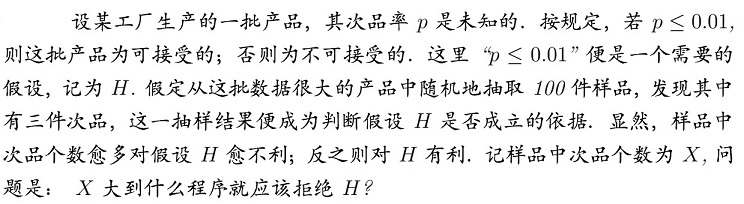

可以设定原假设为:次品率小于等于0.01，如抽中的100件样品中存在3个次品能否满足原假设？<br>

计算次品率为0.01时，100个样品中存在3个及以上次品的概率$P_{p=0.01}$(X$\geq$3)是多少？
  <br>计算结果分为两种情况解读：<br>

  (1) 如果概率很小，说明发生3个次品的概率非常小。但事实是仍在100个样品中抽中3个或以上的次品，

也就是说发生了小概率的事件，从反面说明次品率为0.01假设不可靠。这是反证法。

  (2) 如果概率较大，说明假设0.01次品率的情况下，有很大概率抽中3个或以上的次品，

从正面说明0.01次品率的假设比较可靠。

概率到底要小的何种程度才可以拒绝原假设，或大到何种程度才不拒绝原假设？

通过显著性水平𝛼的值确定：

严格一点设为0.01或以下；宽松一点设为0.1；最常用值为0.05。

按照显著性水平0.1的标准，概率0.08足以拒绝原假设。


In [2]:
'''
如何计算在假设次品率为0.01的情况下，抽中3个以上次品的概率是多少
这是典型的二项分布问题，是一种离散型随机变量的分布模型
从代码中可以看出，该概率为0.07937320225218047，约等于0.08
概率很小，说明原假设p<=0.01很可疑，应该拒绝原假设
'''
import numpy as np
import scipy.stats as st
from  collections import namedtuple 
#第一种方法：计算次品个数为0、1、2个的概率之和，然后用1-概率和，即可得出。
#p1 = 1-(st.binom.pmf(0,100,0.01)+st.binom.pmf(1,100,0.01)+st.binom.pmf(2,100,0.01)
p1 = 1-st.binom.cdf(2,100,0.01)#1-次品个数<=2的累积分布函数
print('第一种方法计算p(x>=3)：',p1)
#第二种方法：计算3个次品的概率质量函数+3个以上次品的生存函数
p2 = st.binom.pmf(3,100,0.01)+st.binom.sf(3,100,0.01)
print('\n第二种方法计算p(x>=3)：',p2)
#第三种方法：通过生存函数计算
p3 = st.binom.sf(2,100,0.01)
print('\n第三种方法计算p(x>=3)：',p3)

第一种方法计算p(x>=3)： 0.07937320225218047

第二种方法计算p(x>=3)： 0.07937320225218034

第三种方法计算p(x>=3)： 0.07937320225218046


-------------------------

## 3.2 参数检验
主要对服从正态分布的总体进行参数检验，检验对象包括正态分布样本的均值$\mu$与方差$\sigma^2$两个参数。

### 3.2.1 正态总体均值$\mu$的假设检验



#### 补充：$P$值的意义与计算过程
前文中的单个正态总体的均值检验为例，其拒绝域一般为某个值大于或小于特定值，准确来说是某个值大于或小于特定值的概率。这个概率就是$P$值，然后将$P$值和显著性水平$\alpha$比较，如果小于$\alpha$，则拒绝原假设。


In [3]:
'''
P值计算公式。
注意函数使用了参数组，*params表示元组，可以是传入多个实参。
'''
def pvalue(cdf,x,*params,side='two-sided'):
    n=len(params)    
    P=None
    if n==0:
        P=cdf(x)
    elif n==1:
        P=cdf(x,params[0])
    elif n==2:
        P=cdf(x,params[0],params[1])
    elif n==3:
        P=cdf(x,params[0],params[1],params[2])
    else:
        raise Exception("Params is wrong!")
    ###以备择假设作为标准确定是检验哪一边
    #R语言习惯用法
    if side=='less':#备择假设：总体均值小于mu
        P=P
    elif side=='greater':#备择假设：总体均值大于mu
        P = 1-P
    elif side=='two-sided':#备择假设：总体均值不等于mu
        if P<1/2: 
            P=2*P            
        else: 
            P=2*(1-P)
    return P

In [4]:
'''
单正态总体的均值检验。
'''
from collections import namedtuple
MTResultSet = namedtuple('MTResultSet',['Mean','DF','Statistic','P_value'])
def mean_test(x,mu=0,sigma=-1,side='two-sided'):
    n=len(x)
    mx=np.mean(x)
    if sigma>0:
        z=(mx-mu)/(sigma/np.sqrt(n))
        P=pvalue(st.norm.cdf,z,side=side)
        result=MTResultSet(Mean=np.round(mx,6),DF=n,
                           Statistic='Z={}'.format(np.round(z,6)),P_value=P)
    else:
        t=(mx-mu)/(st.tstd(x)/np.sqrt(n))
        P=pvalue(st.t.cdf,t,n-1,side=side)
        result=MTResultSet(Mean=np.round(mx,6),DF=n-1,
                           Statistic='t={}'.format(np.round(t,6)),P_value=P)
    return result

#### 示例：
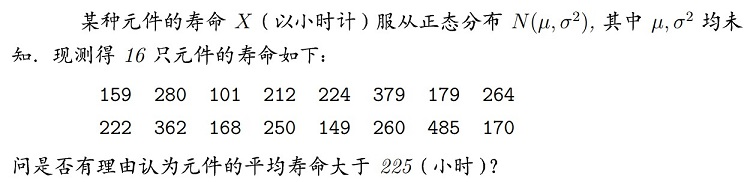

In [5]:
'''
验证样本数据的平均值是否等于、大于或小于某个特定值
'''
x=np.array([159, 280, 101, 212, 224, 379, 179, 264,
            222, 362, 168, 250, 149, 260, 485, 170])

#原假设：元件平均寿命<225,P值远大于0.05，所以不能拒绝原假设
#side=‘greater’
print('原假设元件平均寿命<225检验：',mean_test(x,mu=225,side='greater'))
#举个极端例子,原假设:元件平均寿命<100,P值远小于0.05,所以拒绝原假设
#即认为元件的平均寿命不可能小于100
print('原假设元件平均寿命<100检验：',mean_test(x,mu=100,side= 'greater'))

#元件平均寿命=225检验
print('原假设元件平均寿命=225检验：',mean_test(x,mu=225,side='two-sided'))
#极端例子：平均寿命=100
print('原假设元件平均寿命=100检验：',mean_test(x,mu=100,side='two-sided'))

原假设元件平均寿命<225检验： MTResultSet(Mean=241.5, DF=15, Statistic='t=0.668518', P_value=0.2569800715875836)
原假设元件平均寿命<100检验： MTResultSet(Mean=241.5, DF=15, Statistic='t=5.733046', P_value=1.979644798266733e-05)
原假设元件平均寿命=225检验： MTResultSet(Mean=241.5, DF=15, Statistic='t=0.668518', P_value=0.5139601431751673)
原假设元件平均寿命=100检验： MTResultSet(Mean=241.5, DF=15, Statistic='t=5.733046', P_value=3.959289596533466e-05)


In [6]:
'''
通过拒绝域的方式进行检验。

'''
###alpha=0.5,alpha/2的上分位数
#通过0.975计算下分位数
T_alpha2=st.t.ppf(0.975,len(x)-1)
T_alpha=st.t.ppf(0.95,len(x)-1)
T_alpha2,T_alpha

(2.131449545559323, 1.7530503556925547)

In [7]:
'''
用scipy的函数进行检验,零件的平均寿命是否等于255

'''
st.ttest_1samp(x,225)

Ttest_1sampResult(statistic=0.6685176967463559, pvalue=0.5139601431751674)

In [8]:
'''
第2章的置信区间计算公式:side='two-sided'表示双侧置信区间，
                    'upper'表示单侧置信上限，'lower'表示单侧置信下限。
'''

UniMuResultSet = namedtuple('UniMuResultSet',['Mean','DF','Lower','Upper'])
def interval_mu4(x, sigma=-1,side='two-sided',alpha=0.05):
    n=len(x)
    mx=np.mean(x)
    if sigma>0:#已知总体方差
        if side=='upper':#单侧置信上限
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha)
            lower=float('-Inf')
            upper=mx+tmp
        elif side=='lower':#单侧置信下限
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha)
            lower=mx-tmp
            upper=float('Inf')
        else:#双侧置信区间
            #当进行双侧置信区间估计时，分位数的概率为1-alpha/2或alpha/2
            tmp=sigma/np.sqrt(n)*st.norm.ppf(1-alpha/2)
            lower=mx-tmp
            upper=mx+tmp
        df=n
    else:#总体方差未知
        if side=='upper':#置信上限
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha,n-1)
            lower=float('-Inf')
            upper=mx+tmp
        elif side=='lower':#单侧置信下限
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha,n-1)
            lower=mx-tmp
            upper=float('Inf')
        elif side=='two-sided':#双侧置信区间
            #当进行双侧置信区间估计时，分位数的概率为1-alpha/2或alpha/2
            tmp=st.tstd(x)/np.sqrt(n)*st.t.ppf(1-alpha/2,n-1)
            lower=mx-tmp
            upper=mx+tmp
        df=n-1
    return UniMuResultSet(Mean=mx,DF=df,Lower=np.round(lower,6),Upper=np.round(upper,6))

In [9]:
#元件平均寿命的双侧置信区间，单侧置信区间的下限和上限
interval_mu4(x,side='two-sided'),interval_mu4(x,side='lower'),interval_mu4(x,side='upper')

(UniMuResultSet(Mean=241.5, DF=15, Lower=188.89269, Upper=294.10731),
 UniMuResultSet(Mean=241.5, DF=15, Lower=198.232139, Upper=inf),
 UniMuResultSet(Mean=241.5, DF=15, Lower=-inf, Upper=284.767861))

#### （2）两个总体$X$,$Y$的均值假设检验


In [10]:
'''
两总体的均值检验，一般检验二者是否相等，或者大、小
'''
DMTResultSet = namedtuple('DMTResultSet',['Mean','DF','Statistic','P_value'])
def mean_test2(x,y,sigma=np.array([-1,-1]),vareq=False,side='two-sided'):
    n1=len(x)
    n2=len(y)
    mx=np.mean(x)
    my=np.mean(y)
    if np.all(sigma>0): #已知总体方差
        z=(mx-my)/np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
        P=pvalue(st.norm.cdf,z,side=side)
        result=DMTResultSet(Mean=mx-my,DF=n1+n2,Statistic='Z={}'.format(z),P_value=P)
    else:
        if vareq:#总体方差未知，且X,Y的方差相等
            sw=np.sqrt(((n1-1)*st.tvar(x)+(n2-1)*st.tvar(y))/(n1+n2-2))
            t=(mx-my)/(sw*np.sqrt(1/n1+1/n2))
            nu=n1+n2-2 #t检验的自由度
        else:#总体方差位置，且X,Y的方差不相等
            s1=st.tvar(x) #用样本方差代替
            s2=st.tvar(y)
            
            #求t检验的自由度
            nu=(s1/n1+s2/n2)**2/(s1**2/n1**2/(n1-1)+s2**2/n2**2/(n2-1))
            t=(mx-my)/np.sqrt(s1/n1+s2/n2)
        P=pvalue(st.t.cdf,t,nu,side=side)
        result=DMTResultSet(Mean=mx-my,DF=nu,Statistic='t={}'.format(t),P_value=P)
    return result

#### 示例：
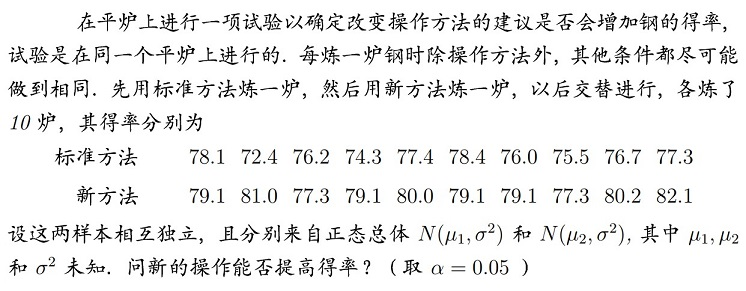

In [11]:
'''
根据示例要求，是要检验新方法的得率是否大于（高于）标准方法的得率。
通过总体的均值检验可以解决这个问题。
'''
x=np.array([78.1,72.4,76.2,74.3,77.4,78.4,76.0,75.5,76.7,77.3])
y=np.array([79.1,81.0,77.3,79.1,80.0,79.1,79.1,77.3,80.2,82.1])
#假设二者的方差相等，原假设分别为：u1>u2，u1<u2，u1=u2
mean_test2(x,y,vareq=True,side='less'),mean_test2(x,y,vareq=True,side='greater'),\
mean_test2(x,y,vareq=True,side='two-sided')

(DMTResultSet(Mean=-3.200000000000017, DF=18, Statistic='t=-4.295742770569863', P_value=0.0002175927367919799),
 DMTResultSet(Mean=-3.200000000000017, DF=18, Statistic='t=-4.295742770569863', P_value=0.999782407263208),
 DMTResultSet(Mean=-3.200000000000017, DF=18, Statistic='t=-4.295742770569863', P_value=0.0004351854735839598))

In [12]:
###假设二者的方差不相等，使用自定义函数进行双边检验
mean_test2(x,y,vareq=False,side='two-sided')

DMTResultSet(Mean=-3.200000000000017, DF=17.319431021959662, Statistic='t=-4.295742770569864', P_value=0.0004709630861575936)

In [13]:
###使用scipy的ttest_ind

st.ttest_ind(x,y,equal_var=True),st.ttest_ind(x,y,equal_var=False)

(Ttest_indResult(statistic=-4.295742770569864, pvalue=0.00043518547358395936),
 Ttest_indResult(statistic=-4.295742770569864, pvalue=0.0004709630861575945))

In [14]:
#假设二者的方差不相等，原假设分别为：u1>u2，u1<u2，u1=u2
mean_test2(x,y,vareq=False,side='less'),mean_test2(x,y,vareq=False,side='greater'),\
mean_test2(x,y,vareq=False,side='two-sided')

(DMTResultSet(Mean=-3.200000000000017, DF=17.319431021959662, Statistic='t=-4.295742770569864', P_value=0.0002354815430787968),
 DMTResultSet(Mean=-3.200000000000017, DF=17.319431021959662, Statistic='t=-4.295742770569864', P_value=0.9997645184569212),
 DMTResultSet(Mean=-3.200000000000017, DF=17.319431021959662, Statistic='t=-4.295742770569864', P_value=0.0004709630861575936))

In [15]:
'''
利用interval_mu5(x,y)函数估计两个总体均值差的单侧置信区间上限
'''
DsMuResultSet = namedtuple('DsMuResultSet',['Mean','DF','Lower','Upper'])
def interval_mu5(x,y, sigma=np.array([-1,-1]),vareq=False,side='two-sided',alpha=0.05):
    n1=len(x)
    n2=len(y)
    mx=np.mean(x)
    my=np.mean(y)
    diff=mx-my
    if np.all(sigma>=0):
        if side=='upper':#置信上限
            tmp=st.norm.ppf(1-alpha)*np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
            lower=float('-Inf')
            upper=diff+tmp
        elif side=='lower':
            tmp=st.norm.ppf(1-alpha)*np.sqrt(sigma[0]**2/n1+simga[1]**2/n2)
            lower=diff-tmp
            upper=float('Inf')
        elif side=='two-sided':
            tmp=st.norm.ppf(1-alpha/2)*np.sqrt(sigma[0]**2/n1+sigma[1]**2/n2)
            lower=diff-tmp
            upper=diff+tmp
        df=n1+n2
    else:
        if vareq:
            sw=((n1-1)*st.tvar(x)+(n2-1)*st.tvar(y))/(n1+n2-2)
            if side=='upper':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha,n1+n2-2)
                lower=float('-Inf')
                upper=diff+tmp
            elif side=='lower':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha,n1+n2-2)
                lower=diff-tmp
                upper=float('Inf')
            elif side=='two-sided':
                tmp=np.sqrt(sw*(1/n1+1/n2))*st.t.ppf(1-alpha/2,n1+n2-2)
                lower=diff-tmp
                upper=diff+tmp
            df=n1+n2-2
        else:
            s1=st.tvar(x)
            s2=st.tvar(y)
            nu=(s1/n1+s2/n2)**2/(s1**2/n1**2/(n1-1)+s2**2/n2**2/(n2-1))
            if side=='upper':
                tmp=st.t.ppf(1-alpha,nu)*np.sqrt(s1/n1+s2/n2)
                lower=float('-Inf')
                upper=diff+tmp
            elif side=='lower':
                tmp=st.t.ppf(1-alpha,nu)*np.sqrt(s1/n1+s2/n2)
                lower=diff-tmp
                upper=float('Inf')
            elif side=='two-sided':
                tmp=st.t.ppf(1-alpha/2,nu)*np.sqrt(s1/n1+s2/n2)
                lower=diff-tmp
                upper=diff+tmp
            df=nu
    return DsMuResultSet(Mean=np.round(diff,6),
                         DF=np.round(df,6),
                         Lower=np.round(lower,6),
                         Upper=np.round(upper,6))
##在方差不等和相等的情况下求均值差的单侧置信上限和双侧置信区间
interval_mu5(x,y,side='upper'),interval_mu5(x,y,vareq=True,side='upper'),\
interval_mu5(x,y,side='two-sided'),interval_mu5(x,y,vareq=True,side='two-sided')

(DsMuResultSet(Mean=-3.2, DF=17.319431, Lower=-inf, Upper=-1.9055),
 DsMuResultSet(Mean=-3.2, DF=18, Lower=-inf, Upper=-1.908255),
 DsMuResultSet(Mean=-3.2, DF=17.319431, Lower=-4.769446, Upper=-1.630554),
 DsMuResultSet(Mean=-3.2, DF=18, Lower=-4.765026, Upper=-1.634974))

In [16]:
'''
成对数据的均值差检验，可以应用一个总体单侧检验方式，第一个参数：x-y，第二个参数mu=0

'''
mean_test(x-y,mu=0,side='less')

MTResultSet(Mean=-3.2, DF=9, Statistic='t=-4.201806', P_value=0.0011502667815299372)

### 3.2.2 正态总体方差的假设检验<br>

#### (1) 单个总体的情况



In [17]:
'''
方差检验，分为均值已知和未知
'''
VTResultSet = namedtuple('VTResultSet',['Var','DF','Chisq2','P_value'])
def var_test(x, sigma2=1, mu=float('Inf'),side='two-sided'):
    n=len(x)
    if mu<float('Inf'):
        s2=np.sum((x-mu)**2)/n
        df=n
    else:
        s2=st.tvar(x)
        df=n-1
    ch2=df*s2/sigma2
    P=pvalue(st.chi2.cdf,ch2,df,side=side)
    return VTResultSet(Var=s2,DF=df,Chisq2=ch2,P_value=P)


示例：
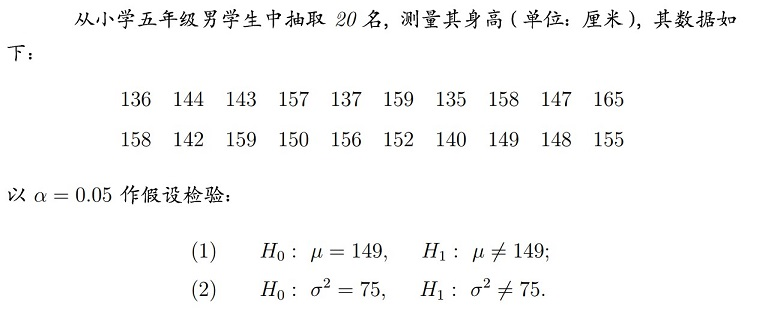

In [18]:
'''
均值与方差检验。
'''
x=np.array([136,144,143,157,137,159,135,158,147,165,
            158,142,159,150,156,152,140,149,148,155])
###方差已知，检验均值=149
print(mean_test(x,mu=149,sigma=75**0.5))
###方差未知，检验均值=149
print(mean_test(x,mu=149))

###均值已知，检验方差=75
print(var_test(x,sigma2=75,mu=149))
###均值未知，检验方差=75
print(var_test(x,sigma2=75))


MTResultSet(Mean=149.5, DF=20, Statistic='Z=0.258199', P_value=0.7962534147376392)
MTResultSet(Mean=149.5, DF=19, Statistic='t=0.253613', P_value=0.8025186056918332)
VTResultSet(Var=74.1, DF=20, Chisq2=19.76, P_value=0.9460601361279235)
VTResultSet(Var=77.73684210526316, DF=19, Chisq2=19.693333333333335, P_value=0.8264784681893849)


#### (2) 两个总体的情况


In [19]:
'''
两个总体方差检验函数
'''
DVTResultSet = namedtuple('DVTResultSet',['VRate','DF1','DF2','F','P_value'])
def var_test2(x,y,mu=np.array([float('Inf'),float('Inf')]),side='two-sided'):
    n1=len(x)
    n2=len(y)
    if np.all(mu<float('Inf')):
        sx2=np.sum((x-mu[0])**2)/n1
        sy2=np.sum((y-mu[1])**2)/n2
        df1=n1
        df2=n2
    else:
        sx2=st.tvar(x)
        sy2=st.tvar(y)
        df1=n1-1
        df2=n2-1
    rate=sx2/sy2
    P=pvalue(st.f.cdf,rate,df1,df2,side=side)
    return DVTResultSet(VRate=rate,DF1=df1,DF2=df2,F=rate,P_value=P)

#### 示例：使用前文中的平炉炼钢数据进行方差的假设检验
   <div align='center'>$H_0$: $\sigma^2_1$ $=$ $\sigma^2_2$ , $H_1$: $\sigma^2_1$ $\neq$ $\sigma^2_2$



In [20]:
'''
新旧两个平炉炼钢的方差比较,
P值远大于0.05，很显然无法拒绝原假设，即方差相等
'''
x=np.array([78.1,72.4,76.2,74.3,77.4,78.4,76.0,75.5,76.7,77.3])
y=np.array([79.1,81.0,77.3,79.1,80.0,79.1,79.1,77.3,80.2,82.1])

###检验方差相等的原假设，不拒绝原假设，即方差相等
print('方差检验的结果：',var_test2(x,y))

###使用第2章interval_var4函数估计双侧置信区间
###方差比1包含在置信区间内，所以不能拒绝方差相等的原假设。
print('\n方差比的双侧置信区间：',interval_var4(x,y))

方差检验的结果： DVTResultSet(VRate=1.494480795165075, DF1=9, DF2=9, F=1.494480795165075, P_value=0.5590224224669993)


NameError: name 'interval_var4' is not defined

In [21]:
'''
比较两个样本数据测量的误差大小，特别是方差比的单侧置信下限、上限
'''
DsVRateResultSet = namedtuple('DsVRateResultSet',['Rate','DF1','DF2','Lower','Upper'])
def interval_var4(x,y,mu=np.array([float('Inf'),float('Inf')]),side='two-sided',alpha=0.05):
    n1=len(x)
    n2=len(y)
    if np.all(mu<float('Inf')):
        sx2=1/n1*np.sum((x-mu[0])**2)
        df1=n1
        sy2=1/n2*np.sum((y-mu[1])**2)
        df2=n2
    else:
        sx2=st.tvar(x)
        sy2=st.tvar(y)
        df1=n1-1
        df2=n2-1
    rate=sx2/sy2
    if side=='upper':
        lower=0
        upper=rate/st.f.ppf(alpha,df1,df2)
    elif side=='lower':
        lower=rate/st.f.ppf(1-alpha,df1,df2)
        upper=float('Inf')
    elif side=='two-sided':
        lower=rate/st.f.ppf(1-alpha/2,df1,df2)
        upper=rate/st.f.ppf(alpha/2,df1,df2)
    
    return DsVRateResultSet(Rate=np.round(rate,6),
                            DF1=df1,DF2=df2,
                            Lower=np.round(lower,6),
                            Upper=np.round(upper,6))    

### 3.2.3 二项分布总体的假设检验
#### 示例：
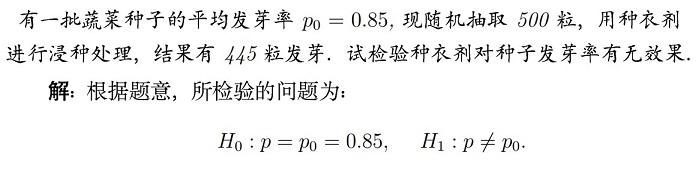

In [22]:
##P值小于0.05，所以拒绝原假设：=0.85
print('检验结果的P值：',st.binom_test(445,500,0.85))

检验结果的P值： 0.012066383397268909



#####  二项分布的比例置信区间计算方式有两种



In [23]:
###R语言的二项分布比例置信区间
lower_beta=st.beta.ppf(0.025,445,500-445+1)
upper_beta=st.beta.ppf(0.975,445+1,500-445)
print('beta分布置信区间的计算结果：[%0.7f,%0.7f]'%(lower_beta,upper_beta))

###使用正态分布估计二项分布比例置信区间，效果略好于前者
n=500 #总次数
X=445 #成功次数
z2=st.norm.ppf(0.975)**2 #标准正态分布分位数的平方
n_hat=n+z2 #注意双侧置信区间使用0.975分位
p_hat=(X+z2/2)/n_hat #成功次数的比例
lower_norm=p_hat-st.norm.ppf(0.975)*np.sqrt(p_hat*(1-p_hat)/n_hat) #下限
upper_norm=p_hat+st.norm.ppf(0.975)*np.sqrt(p_hat*(1-p_hat)/n_hat) #上限
print('\n标准正态分布置信区间的计算结果：[%0.7f,%0.7f]'%(lower_norm,upper_norm))

beta分布置信区间的计算结果：[0.8592342,0.9160509]

标准正态分布置信区间的计算结果：[0.8593853,0.9146678]


#### 示例：
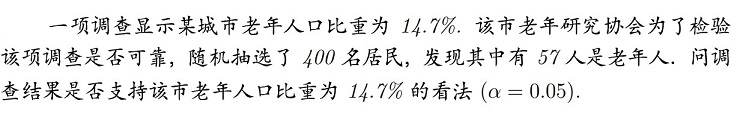

In [24]:
###很明显，P值远大于0.05，不能拒绝老年人占比14.7%的原假设
print('二项分布检验结果：',st.binom_test(57,400,0.147))

##置信区间包含了0.147，证明二项分布检验的可靠
lower_beta=st.beta.ppf(0.025,57,400-57+1)
upper_beta=st.beta.ppf(0.975,57+1,400-57)
print('\n分布置信区间的计算结果：[%0.7f,%0.7f]'%(lower_beta,upper_beta))

二项分布检验结果： 0.88764467759844

分布置信区间的计算结果：[0.1097477,0.1806511]


------------